# Transfer Learning

## [VGG-16](https://github.com/keras-team/keras-applications/blob/master/keras_applications/vgg16.py)
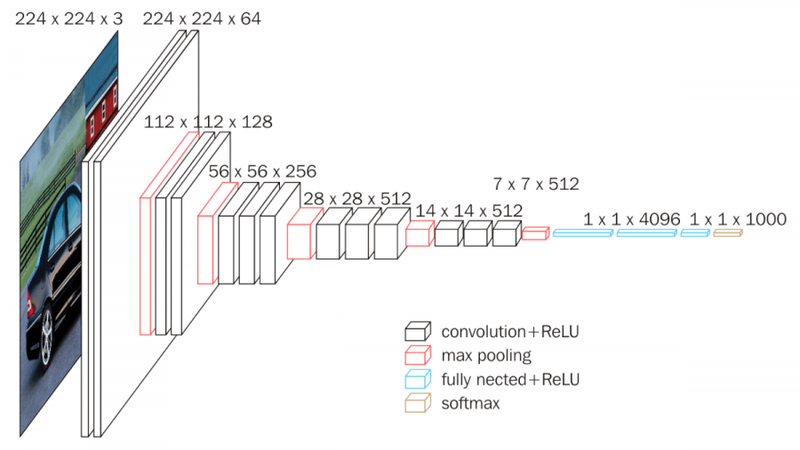

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.applications import imagenet_utils

# CIFAR100 데이터셋을 가져옵시다. 
cifar100 = keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(len(x_train), len(x_test))

50000 10000


In [2]:
img_input = keras.Input(shape=(32, 32, 3))

x = keras.layers.Conv2D(16, 3, activation='relu')(img_input)
x = keras.layers.MaxPool2D((2,2))(x)
x = keras.layers.Conv2D(32, 3, activation='relu')(x)
x = keras.layers.MaxPool2D((2,2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
predictions = keras.layers.Dense(100, activation='softmax')(x)

model = keras.Model(inputs=img_input, outputs=predictions)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               295168

In [3]:
# 모델 학습!! 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)    # 1 Epoch만 학습합니다.

1563/1563 [==============================] - 6s 4ms/step - loss: 3.6493 - accuracy: 0.1521


In [4]:
# 1번째 블록(예시)
x = layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv1')(img_input)
x = layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

print('1번째 블록 OK!!')

1번째 블록 OK!!


In [5]:
# 2번째 블록
x = layers.Conv2D(128, (3, 3), 
                  activation='relu', 
                  padding='same', 
                  name='block2_conv1')(x)
x = layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

print('2번째 블록 OK!!')

2번째 블록 OK!!


In [6]:
# 3번째 블록
x = layers.Conv2D(256, (3, 3), 
                  activation='relu', 
                  padding='same', 
                  name='block3_conv1')(x)
x = layers.Conv2D(256, (3, 3), 
                  activation='relu', 
                  padding='same', 
                  name='block3_conv2')(x)
x = layers.Conv2D(256, (3, 3), 
                  activation='relu', 
                  padding='same', 
                  name='block3_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

print('3번째 블록 OK!!')

3번째 블록 OK!!


In [7]:
# 4번째 블록
x = layers.Conv2D(512, (3, 3), 
                  activation='relu', 
                  padding='same', 
                  name='block4_conv1')(x)
x = layers.Conv2D(512, (3, 3), 
                  activation='relu', 
                  padding='same', 
                  name='block4_conv2')(x)
x = layers.Conv2D(512, (3, 3), 
                  activation='relu', 
                  padding='same', 
                  name='block4_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

print('4번째 블록 OK!!')

4번째 블록 OK!!


In [8]:
# 5번째 블록
x = layers.Conv2D(
    512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = layers.Conv2D(
    512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = layers.Conv2D(
    512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

print('5번째 블록 OK!!')

5번째 블록 OK!!


In [9]:
# 6번째 블록
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(4096, activation='relu', name='fc1')(x)
x = layers.Dense(4096, activation='relu', name='fc2')(x)

classes=100
x = layers.Dense(classes, activation='softmax', name='predictions')(x)    # CIFA

print('6번째 블록 OK!!')

6번째 블록 OK!!


In [10]:
model = keras.Model(inputs=img_input, outputs=x)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [11]:
# 모델 학습!! 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)    # 1 Epoch만 학습합니다.

1563/1563 [==============================] - 74s 47ms/step - loss: 4.6065 - accuracy: 0.0089


## [ResNet-50](https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py)
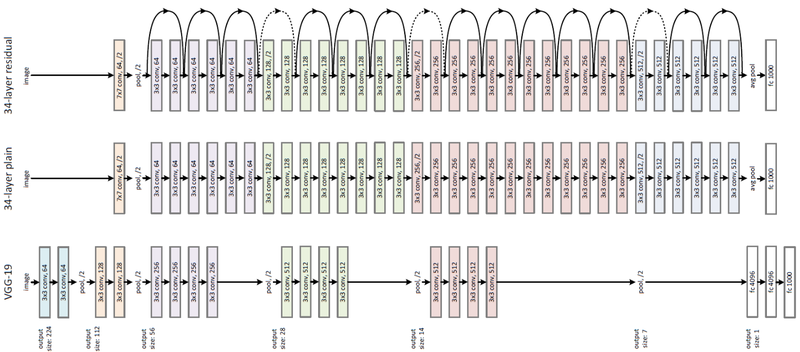

In [13]:
# 추가로 import해야 할 패키지들을 먼저 가져옵니다.
from tensorflow.python.keras import backend
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import initializers
from tensorflow.python.keras import models

# block 안에 반복적으로 활용되는 L2 regularizer를 선언해 줍니다.


def _gen_l2_regularizer(use_l2_regularizer=True, l2_weight_decay=1e-4):
    return regularizers.l2(l2_weight_decay) if use_l2_regularizer else None


print('Resnet50 GoGo!!')

Resnet50 GoGo!!


In [14]:
def conv_block(input_tensor,
               kernel_size,
               filters,
               stage,
               block,
               strides=(2, 2),
               use_l2_regularizer=True,
               batch_norm_decay=0.9,
               batch_norm_epsilon=1e-5):
    """A block that has a conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
        strides: Strides for the first conv layer in the block.
    # Returns
        Output tensor for the block.
    Note that from stage 3,
    the first conv layer at main path is with strides=(2, 2)
    And the shortcut should have strides=(2, 2) as well
    """
    filters1, filters2, filters3 = filters
    if backend.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(filters1, (1, 1), strides=strides,
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same',
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = layers.Conv2D(filters3, (1, 1), strides=strides,
                             kernel_initializer='he_normal',
                             name=conv_name_base + '1')(input_tensor)
    shortcut = layers.BatchNormalization(
        axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

In [15]:
def identity_block(input_tensor,
                   kernel_size,
                   filters,
                   stage,
                   block,
                   use_l2_regularizer=True,
                   batch_norm_decay=0.9,
                   batch_norm_epsilon=1e-5):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """
    filters1, filters2, filters3 = filters
    if backend.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(filters1, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size,
                      padding='same',
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = layers.Activation('relu')(x)
    return x

In [16]:
def resnet50(num_classes,
             batch_size=None,
             use_l2_regularizer=True,
             rescale_inputs=False,
             batch_norm_decay=0.9,
             batch_norm_epsilon=1e-5):
    """Instantiates the ResNet50 architecture.
    Args:
      num_classes: `int` number of classes for image classification.
      batch_size: Size of the batches for each step.
      use_l2_regularizer: whether to use L2 regularizer on Conv/Dense layer.
      rescale_inputs: whether to rescale inputs from 0 to 1.
      batch_norm_decay: Moment of batch norm layers.
      batch_norm_epsilon: Epsilon of batch borm layers.
    Returns:
        A Keras model instance.
    """

    input_shape = (32, 32, 3)  # CIFAR100을 위한 input_shape 조정입니다.
    img_input = layers.Input(shape=input_shape, batch_size=batch_size)
    if rescale_inputs:
        # Hub image modules expect inputs in the range [0, 1]. This rescales these
        # inputs to the range expected by the trained model.
        x = layers.Lambda(
            lambda x: x * 255.0 - backend.constant(
                imagenet_preprocessing.CHANNEL_MEANS,
                shape=[1, 1, 3],
                dtype=x.dtype),
            name='rescale')(
                img_input)
    else:
        x = img_input

    if backend.image_data_format() == 'channels_first':
        x = layers.Permute((3, 1, 2))(x)
        bn_axis = 1
    else:  # channels_last
        bn_axis = 3

    block_config = dict(
        use_l2_regularizer=use_l2_regularizer,
        batch_norm_decay=batch_norm_decay,
        batch_norm_epsilon=batch_norm_epsilon)
    x = layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(x)
    x = layers.Conv2D(
        64, (7, 7),
        strides=(2, 2),
        padding='valid',
        use_bias=False,
        kernel_initializer='he_normal',
        kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
        name='conv1')(
            x)
    x = layers.BatchNormalization(
        axis=bn_axis,
        momentum=batch_norm_decay,
        epsilon=batch_norm_epsilon,
        name='bn_conv1')(
            x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = conv_block(
        x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1), **block_config)
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b', **block_config)
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c', **block_config)

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a', **block_config)
    x = identity_block(x, 3, [128, 128, 512], stage=3,
                       block='b', **block_config)
    x = identity_block(x, 3, [128, 128, 512], stage=3,
                       block='c', **block_config)
    x = identity_block(x, 3, [128, 128, 512], stage=3,
                       block='d', **block_config)

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a', **block_config)
    x = identity_block(x, 3, [256, 256, 1024],
                       stage=4, block='b', **block_config)
    x = identity_block(x, 3, [256, 256, 1024],
                       stage=4, block='c', **block_config)
    x = identity_block(x, 3, [256, 256, 1024],
                       stage=4, block='d', **block_config)
    x = identity_block(x, 3, [256, 256, 1024],
                       stage=4, block='e', **block_config)
    x = identity_block(x, 3, [256, 256, 1024],
                       stage=4, block='f', **block_config)

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a', **block_config)
    x = identity_block(x, 3, [512, 512, 2048],
                       stage=5, block='b', **block_config)
    x = identity_block(x, 3, [512, 512, 2048],
                       stage=5, block='c', **block_config)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(
        num_classes,
        kernel_initializer=initializers.RandomNormal(stddev=0.01),
        kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
        bias_regularizer=_gen_l2_regularizer(use_l2_regularizer),
        name='fc1000')(
            x)

    # A softmax that is followed by the model loss must be done cannot be done
    # in float16 due to numeric issues. So we pass dtype=float32.
    x = layers.Activation('softmax', dtype='float32')(x)

    # Create model.
    return models.Model(img_input, x, name='resnet50')

In [17]:
model = resnet50(num_classes=100)

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9408        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [18]:
# 모델 학습!! 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)    # 1 Epoch만 학습합니다.

1563/1563 [==============================] - 92s 59ms/step - loss: 4.5117 - accuracy: 0.0635
